In [1]:
import Ipynb_importer

In [5]:
import TrodesReader
# import from https://bitbucket.org/mkarlsso/trodes/src/master/ or pip install trodesnetwork
from collections import deque
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt
from pprint import pprint

In [6]:
def bandpass_filter(filter_name, flattened_array, sampling_freq, order, lowcut, highcut):
    if filter_name == 'elliptical':
        sos = signal.ellip(order, 0.01, 120, [lowcut, highcut], btype='bp', output='sos', fs=sampling_freq)
    if filter_name == 'butterworth':
        sos = signal.butter(order, [lowcut, highcut], 'bp', fs=sampling_freq, output='sos')
    if filter_name == 'cheby1':
        sos = signal.cheby1(order, 1, [lowcut, highcut], 'bp', fs=sampling_freq, output='sos')
    if filter_name == 'cheby2':
        sos = signal.cheby2(order, 15, [lowcut, highcut], 'bp', fs=sampling_freq, output='sos')

    y = signal.sosfiltfilt(sos, flattened_array)

    return y


def calculate_rms(buffer):
    square_summed = 0
    for k in buffer:
        square_summed += (k ** 2)

    return math.sqrt(square_summed / len(buffer))


def filter_then_rms(buffer, low_cut, high_cut, threshold):
    filtered_buffer = bandpass_filter('butterworth', buffer, lfp_sampling_rate, 1, low_cut, high_cut)
    current_rms = calculate_rms(filtered_buffer)
    return current_rms >= threshold

In [7]:
# this is the 40 min data : 20211207_E1_124311 
# nTrode used: 28
data_path = 'D:\\Recordings\\20211207_E1_124311.LFP\\20211207_E1_124311.LFP_nt28ch1.dat'
time_path = 'D:\\Recordings\\20211207_E1_124311.LFP\\20211207_E1_124311.timestamps.dat'

In [8]:
data = TrodesReader.readTrodesExtractedDataFile(data_path)
#pprint(data)

<string>:69: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


In [9]:
time = TrodesReader.readTrodesExtractedDataFile(time_path)
#pprint(time)

In [10]:
start_time = int(time['first_timestamp'])
time_data = []
for i in time['data']:
    time_data.append((i[0]-start_time)/30000)

In [11]:
lfp_sampling_rate = 1500
lfp_sampling_period = (1/lfp_sampling_rate)*(10**9)

sw_lower = 5
sw_upper = 15
ripple_lower = 150
ripple_upper = 250
num_std = 4

In [12]:
all_data = data['data']
lfp_data = []
for i in all_data:
    lfp_data.append(i[0])

ripple_lfp_data = bandpass_filter('butterworth', lfp_data, lfp_sampling_rate, 1, ripple_lower, ripple_upper)
sw_lfp_data = bandpass_filter('butterworth', lfp_data, lfp_sampling_rate, 1, sw_lower, sw_upper)

In [13]:
offline_rms1500 = []
offline_time1500 = []
offlineripple1500 = []
rawlfp1500 = []
rawlfp = []
for i in range(2360000, 2782000):
    raw_buffer = lfp_data[i-1500:i]
    current_buffer = ripple_lfp_data[i-1500:i]
    current_rms = calculate_rms(current_buffer)
    if(current_rms<=300):
        offline_rms1500.append(current_rms)
        offline_time1500.append(time_data[i])
        offlineripple1500.append(current_buffer)
        rawlfp1500.append(raw_buffer)

In [14]:
online_rms1500 = []
online_time1500 = []
onlineripple1500 = []
online_raw1500 = []
for i in range(2360000, 2782000):
    online_raw = lfp_data[i-1500:i]
    current_buffer = lfp_data[i-1500:i]
    current_filtered = bandpass_filter('butterworth', current_buffer, lfp_sampling_rate, 1, ripple_lower, ripple_upper)
    current_rms = calculate_rms(current_filtered)
    if(current_rms<=300):
        online_rms1500.append(current_rms)
        online_time1500.append(time_data[i])
        onlineripple1500.append(current_filtered)
        online_raw1500.append(online_raw)

In [15]:
online_rms150 = []
online_time150 = []
onlineripple150 = []
online_raw150 = []
for i in range(2360000, 2782000):
    online_raw = lfp_data[i-150:i]
    current_buffer = lfp_data[i-150:i]
    current_filtered = bandpass_filter('butterworth', current_buffer, lfp_sampling_rate, 1, ripple_lower, ripple_upper)
    current_rms = calculate_rms(current_filtered)
    if(current_rms<=300):
        online_rms150.append(current_rms)
        online_time150.append(time_data[i])
        onlineripple150.append(current_filtered)
        online_raw150.append(online_raw)

In [16]:
offline_rms500 = []
offline_time500 = []
offlineripple500 = []
rawlfp500 = []
for i in range(2360000, 2782000):
    raw_buffer = lfp_data[i-500:i]
    current_buffer = ripple_lfp_data[i-500:i]
    current_rms = calculate_rms(current_buffer)
    if(current_rms<=300):
        offline_rms500.append(current_rms)
        offline_time500.append(time_data[i])
        offlineripple500.append(current_buffer)
        rawlfp500.append(raw_buffer)

In [17]:
offline_rms150 = []
offline_time150 = []
offlineripple150 = []
rawlfp150 = []
for i in range(2360000, 2782000):
    raw_buffer = lfp_data[i-150:i]
    current_buffer = ripple_lfp_data[i-150:i]
    current_rms = calculate_rms(current_buffer)
    if(current_rms<=300):
        offline_rms150.append(current_rms)
        offline_time150.append(time_data[i])
        offlineripple150.append(current_buffer)
        rawlfp150.append(raw_buffer)

In [18]:
offline_rms50 = []
offline_time50 = []
offlineripple50 = []
rawlfp50 = []
for i in range(2360000, 2782000):
    raw_buffer = lfp_data[i-50:i]
    current_buffer = ripple_lfp_data[i-50:i]
    current_rms = calculate_rms(current_buffer)
    if(current_rms<=300):
        offline_rms50.append(current_rms)
        offline_time50.append(time_data[i])
        offlineripple50.append(current_buffer)
        rawlfp50.append(raw_buffer)

In [19]:
print(len(rawlfp1500),len(offlineripple1500),len(offline_time1500),len(offline_rms1500))

422000 422000 422000 422000


In [21]:
avg_online1500 = np.mean(online_rms1500)
std_online1500 = np.std(online_rms1500)
threshold_online1500 = avg_online1500 + num_std*std_online1500
print(avg_online1500)
print(std_online1500)
print(threshold_online1500)

40.86503579392547
15.808725003898884
104.09993580952101


In [23]:
avg_online150 = np.mean(online_rms150)
std_online150 = np.std(online_rms150)
threshold_online150 = avg_online150 + num_std*std_online150
print(avg_online150)
print(std_online150)
print(threshold_online150)

35.2554257213291
25.413080950314328
136.9077495225864


In [24]:
avg_offline1500 = np.mean(offline_rms1500)
std_offline1500 = np.std(offline_rms1500)
threshold_offline1500 = avg_offline1500 + num_std*std_offline1500
print(avg_offline1500)
print(std_offline1500)
print(threshold_offline1500)

40.904296376630604
15.814812509954299
104.1635464164478


In [25]:
avg_offline150 = np.mean(offline_rms150)
std_offline150 = np.std(offline_rms150)
threshold_offline150 = avg_offline150 + num_std*std_offline150
print(avg_offline150)
print(std_offline150)
print(threshold_offline150)

35.60290432183957
25.597201471035877
137.99171020598308


In [26]:
avg_offline500 = np.mean(offline_rms500)
std_offline500 = np.std(offline_rms500)
threshold_offline500 = avg_offline500 + num_std*std_offline500
print(avg_offline500)
print(std_offline500)
print(threshold_offline500)

38.50472570783204
20.98254687098591
122.43491319177568


In [27]:
avg_offline50 = np.mean(offline_rms50)
std_offline50 = np.std(offline_rms50)
threshold_offline50 = avg_offline50 + num_std*std_offline50
print(avg_offline50)
print(std_offline50)
print(threshold_offline50)

33.136112696094706
27.270797936685348
142.2193044428361


In [28]:
zscore_online150 = []

for i in range(0,len(online_rms150)):
    zscore_online150.append((online_rms150[i]-avg_online150)/std_online150)
    
zscore_online1500 = []

for i in range(0,len(online_rms1500)):
    zscore_online1500.append((online_rms1500[i]-avg_online1500)/std_online1500)

In [29]:
zscore_offline1500 = []
zscore_offline500 = []
zscore_offline150 = []
zscore_offline50 = []

for i in range(0,len(offline_rms1500)):
    zscore_offline1500.append((offline_rms1500[i]-avg_offline1500)/std_offline1500)
    
for i in range(0,len(offline_rms500)):
    zscore_offline500.append((offline_rms500[i]-avg_offline500)/std_offline500)
    
for i in range(0,len(offline_rms150)):
    zscore_offline150.append((offline_rms150[i]-avg_offline150)/std_offline150)
    
for i in range(0,len(offline_rms50)):
    zscore_offline50.append((offline_rms1500[i]-avg_offline50)/std_offline50)

In [30]:
print(len(zscore_offline1500),len(offline_time1500))

422000 422000


In [31]:
online_decision150 = [False, False]
online_stimulation150 = []

for i in range(0,len(online_rms150)):
    online_decision150.append(online_rms150[i]>threshold_online150)
    current_stimulation150 = True
    for m in range(len(online_decision150)-3,len(online_decision150)):
        if not online_decision150[m]:
            current_stimulation150 = False
    online_stimulation150.append(current_stimulation150)  

online_decision1500 = [False, False]
online_stimulation1500 = []

for i in range(0,len(online_rms1500)):
    online_decision1500.append(online_rms1500[i]>threshold_online1500)
    current_stimulation1500 = True
    for m in range(len(online_decision1500)-3,len(online_decision1500)):
        if not online_decision1500[m]:
            current_stimulation1500 = False
    online_stimulation1500.append(current_stimulation1500)  

In [32]:
offline_decision1500 = [False, False]
offline_stimulation1500 = []

for i in range(0,len(offline_rms1500)):
    offline_decision1500.append(offline_rms1500[i]>threshold_offline1500)
    current_stimulation1500 = True
    for m in range(len(offline_decision1500)-3,len(offline_decision1500)):
        if not offline_decision1500[m]:
            current_stimulation1500 = False
    offline_stimulation1500.append(current_stimulation1500) 
    
offline_decision500 = [False, False]
offline_stimulation500 = []

for i in range(0,len(offline_rms500)):
    offline_decision500.append(offline_rms500[i]>threshold_offline500)
    current_stimulation500 = True
    for m in range(len(offline_decision500)-3,len(offline_decision500)):
        if not offline_decision500[m]:
            current_stimulation500 = False
    offline_stimulation500.append(current_stimulation500) 
    
offline_decision150 = [False, False]
offline_stimulation150 = []

for i in range(0,len(offline_rms150)):
    offline_decision150.append(offline_rms150[i]>threshold_offline150)
    current_stimulation150 = True
    for m in range(len(offline_decision150)-3,len(offline_decision150)):
        if not offline_decision150[m]:
            current_stimulation150 = False
    offline_stimulation150.append(current_stimulation150) 

offline_decision50 = [False, False]
offline_stimulation50 = []

for i in range(0,len(offline_rms50)):
    offline_decision50.append(offline_rms50[i]>threshold_offline50)
    current_stimulation50 = True
    for m in range(len(offline_decision50)-3,len(offline_decision50)):
        if not offline_decision50[m]:
            current_stimulation50 = False
    offline_stimulation50.append(current_stimulation50) 

In [33]:
# offline_stimulation50arr = np.array(offline_stimulation50)
# plt.figure()
# plt.plot(offline_time50,offline_rms50)
# plt.plot(offline_time50,rawlfp50)
# #plt.plot(offline_time,offline_stimulation50arr*300,color='green')
# plt.plot(offline_time50,offline_stimulation50arr*300,color='r')
# plt.show()

In [34]:
# print(sum(offline_stimulation50),sum(offline_stimulation150))
# offline_stimulation50arr = np.array(offline_stimulation50)
# offline_stimulation150arr = np.array(offline_stimulation150)

In [35]:
# %matplotlib notebook

# plt.figure()
# plt.plot(offline_time50,rawlfp50)
# #plt.plot(offline_time,offline_stimulation50arr*300,color='green')
# plt.plot(offline_time500,rawlfp500,color='r')
# plt.show()

In [36]:
# plt.figure()
# plt.plot(zscore_offline50)
# # plt.plot(zscore_offline150)
# # plt.plot(zscore_offline500,color='green')
# # plt.plot(zscore_offline1500,color='k',alpha=0.3)
# plt.show()

In [37]:
print(sum(offline_stimulation50),sum(offline_stimulation150),sum(offline_stimulation500),sum(offline_stimulation1500))

5315 5277 2310 560


In [38]:
# print(len(rawlfp50),len(rawlfp500))

In [39]:
# plt.figure()
# # plt.plot(offline_rms1500,color='k')
# # plt.plot(offline_rms500,color='r')
# plt.plot(offline_rms150,color='green')
# plt.plot(offline_rms50)
# plt.show()

In [40]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(offline_stimulation1500)):
    if offline_stimulation1500[i] == True and online_stimulation1500[i] == True:
        TP += 1
    if offline_stimulation1500[i] == False and online_stimulation1500[i] == False:
        TN += 1    
    if offline_stimulation1500[i] == False and online_stimulation1500[i] == True:
        FP += 1
    if offline_stimulation1500[i] == True and online_stimulation1500[i] == False:
        FN += 1
TP,TN,FP,FN    

(551, 421440, 0, 9)

In [42]:
Accuracy1500 = ((TP+TN)/(TP+TN+FP+FN))*100
print("A:",Accuracy1500)
Precision1500 = TP/(TP+FP) *100
print("P:",Precision1500)
Recall1500 = (TP/(TP+FN))*100
print("R:",Recall1500)

A: 99.9978672985782
P: 100.0
R: 98.39285714285714


In [43]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(offline_stimulation150)):
    if offline_stimulation150[i] == True and online_stimulation150[i] == True:
        TP += 1
    if offline_stimulation150[i] == False and online_stimulation150[i] == False:
        TN += 1    
    if offline_stimulation150[i] == False and online_stimulation150[i] == True:
        FP += 1
    if offline_stimulation150[i] == True and online_stimulation150[i] == False:
        FN += 1
TP,TN,FP,FN    

(5032, 416667, 56, 245)

In [44]:
Accuracy150 = ((TP+TN)/(TP+TN+FP+FN))*100
print("A:",Accuracy150)
Precision150 = TP/(TP+FP) *100
print("P:",Precision150)
Recall150 = (TP/(TP+FN))*100
print("R:",Recall150)

A: 99.92867298578199
P: 98.89937106918238
R: 95.35721053628956


In [45]:
Labels=['Accuracy1500','Accuracy150','Precision1500','Precision150','Recall1500','Recall150']
Values=[Accuracy1500,Accuracy150, Precision1500,Precision150, Recall1500, Recall150]


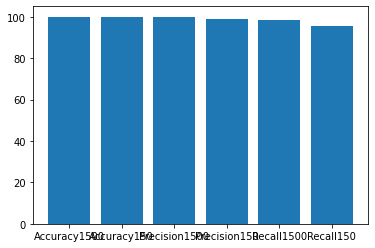

In [46]:
plt.figure()
plt.bar(Labels,Values)
plt.show()